<a href="https://colab.research.google.com/github/rlaxodns/google-/blob/main/keras17_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt


In [ ]:
# 데이터 구성

data = fetch_california_housing()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                    random_state = 442)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(14448, 8) (14448,)
(6192, 8) (6192,)


In [ ]:
# 모델구성
model = Sequential()
model.add(Dense(50, input_dim = 8, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
# 컴파일 및 훈련
model.compile(loss = 'mse', optimizer = 'adam')
st_time = time.time()
hist = model.fit(x_train, y_train, epochs = 100, batch_size = 10,
          validation_split = 0.2, verbose = 2)
end_time = time.time()
print(end_time-st_time)

Epoch 1/100
1156/1156 - 3s - loss: 0.5642 - val_loss: 0.4811 - 3s/epoch - 3ms/step
Epoch 2/100
1156/1156 - 3s - loss: 0.5355 - val_loss: 0.5328 - 3s/epoch - 3ms/step
Epoch 3/100
1156/1156 - 8s - loss: 0.5428 - val_loss: 0.4806 - 8s/epoch - 7ms/step
Epoch 4/100
1156/1156 - 6s - loss: 0.5296 - val_loss: 0.4801 - 6s/epoch - 5ms/step
Epoch 5/100
1156/1156 - 9s - loss: 0.5292 - val_loss: 0.5075 - 9s/epoch - 8ms/step
Epoch 6/100
1156/1156 - 5s - loss: 0.5321 - val_loss: 0.6684 - 5s/epoch - 5ms/step
Epoch 7/100
1156/1156 - 9s - loss: 0.5208 - val_loss: 0.4889 - 9s/epoch - 8ms/step
Epoch 8/100
1156/1156 - 5s - loss: 0.6207 - val_loss: 0.4643 - 5s/epoch - 5ms/step
Epoch 9/100
1156/1156 - 6s - loss: 0.5205 - val_loss: 0.4682 - 6s/epoch - 5ms/step
Epoch 10/100
1156/1156 - 5s - loss: 0.5252 - val_loss: 0.4894 - 5s/epoch - 5ms/step
Epoch 11/100
1156/1156 - 4s - loss: 0.5115 - val_loss: 0.5404 - 4s/epoch - 4ms/step
Epoch 12/100
1156/1156 - 6s - loss: 0.5140 - val_loss: 0.6085 - 6s/epoch - 6ms/step
E

In [ ]:
# 평가 및 예측
loss = model.evaluate(x_test, y_test)
result = model.predict([x])

# 결정계수
y_pre = model.predict(x_test)
r2 = r2_score(y_test, y_pre)
print(r2)

print(loss)
print(result)

194/194 [==============================] - 1s 2ms/step
0.6078134175700186
0.5392802357673645
[[4.2562833 ]
 [4.261388  ]
 [3.44588   ]
 ...
 [0.9127886 ]
 [0.92005765]
 [1.0217023 ]]


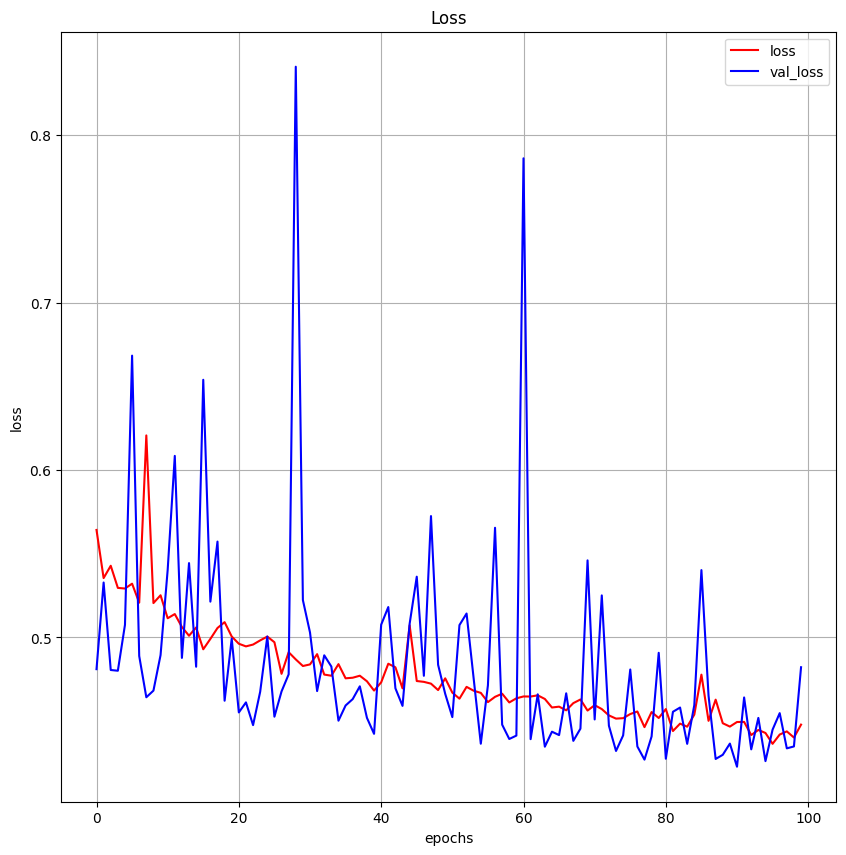

In [ ]:
# 시각화
plt.figure(figsize = (10, 10))
plt.plot(hist.history['loss'], c = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], c = 'blue', label = 'val_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()